# Tutorial 2: Part 2

Objectives:
- Introduce sextupoles in our FODO lattice for chromaticity correction.
- Impact of sextupoles on the phase space with and without chromaticity correction.

**Non-linearities**

1. Add 0.5 m long sextupole attached to the two qudrupoles. With a matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles ($K2_1$ and $K2_1$).


2. Using the $K2_1$ and $K2_1$, $\beta$-function and dispersion at the sextupole location, evaluate using the formula the sextupolar effect on the Q1 for a particle at DELTAP=0.01. Compare with the results obtained in the Tutorial 2: Part 1.


3. Track a prticle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells and DELTAP=0.01. Plot the x-px phase space. Did you manage to recover the original tune for the off-momentum particle? 
    
**REMEMEBER** to make thin your lattice to use the TRACK command.

        track, dump;    
        start, x=1e-3, px=0, y=1e-3, py=0;    
        run, turns=100;   
        endtrack; 
        
4. Track a particle with initial coordinates x,y,px,py=(100,100,0,0). How does the particle move in the phase space, cell after cell? Do you see the tunes? What is going on?


5. Move the tunes to (0.23, 0.23) and repeat the previous point. Is now the prticle stable?

<div>
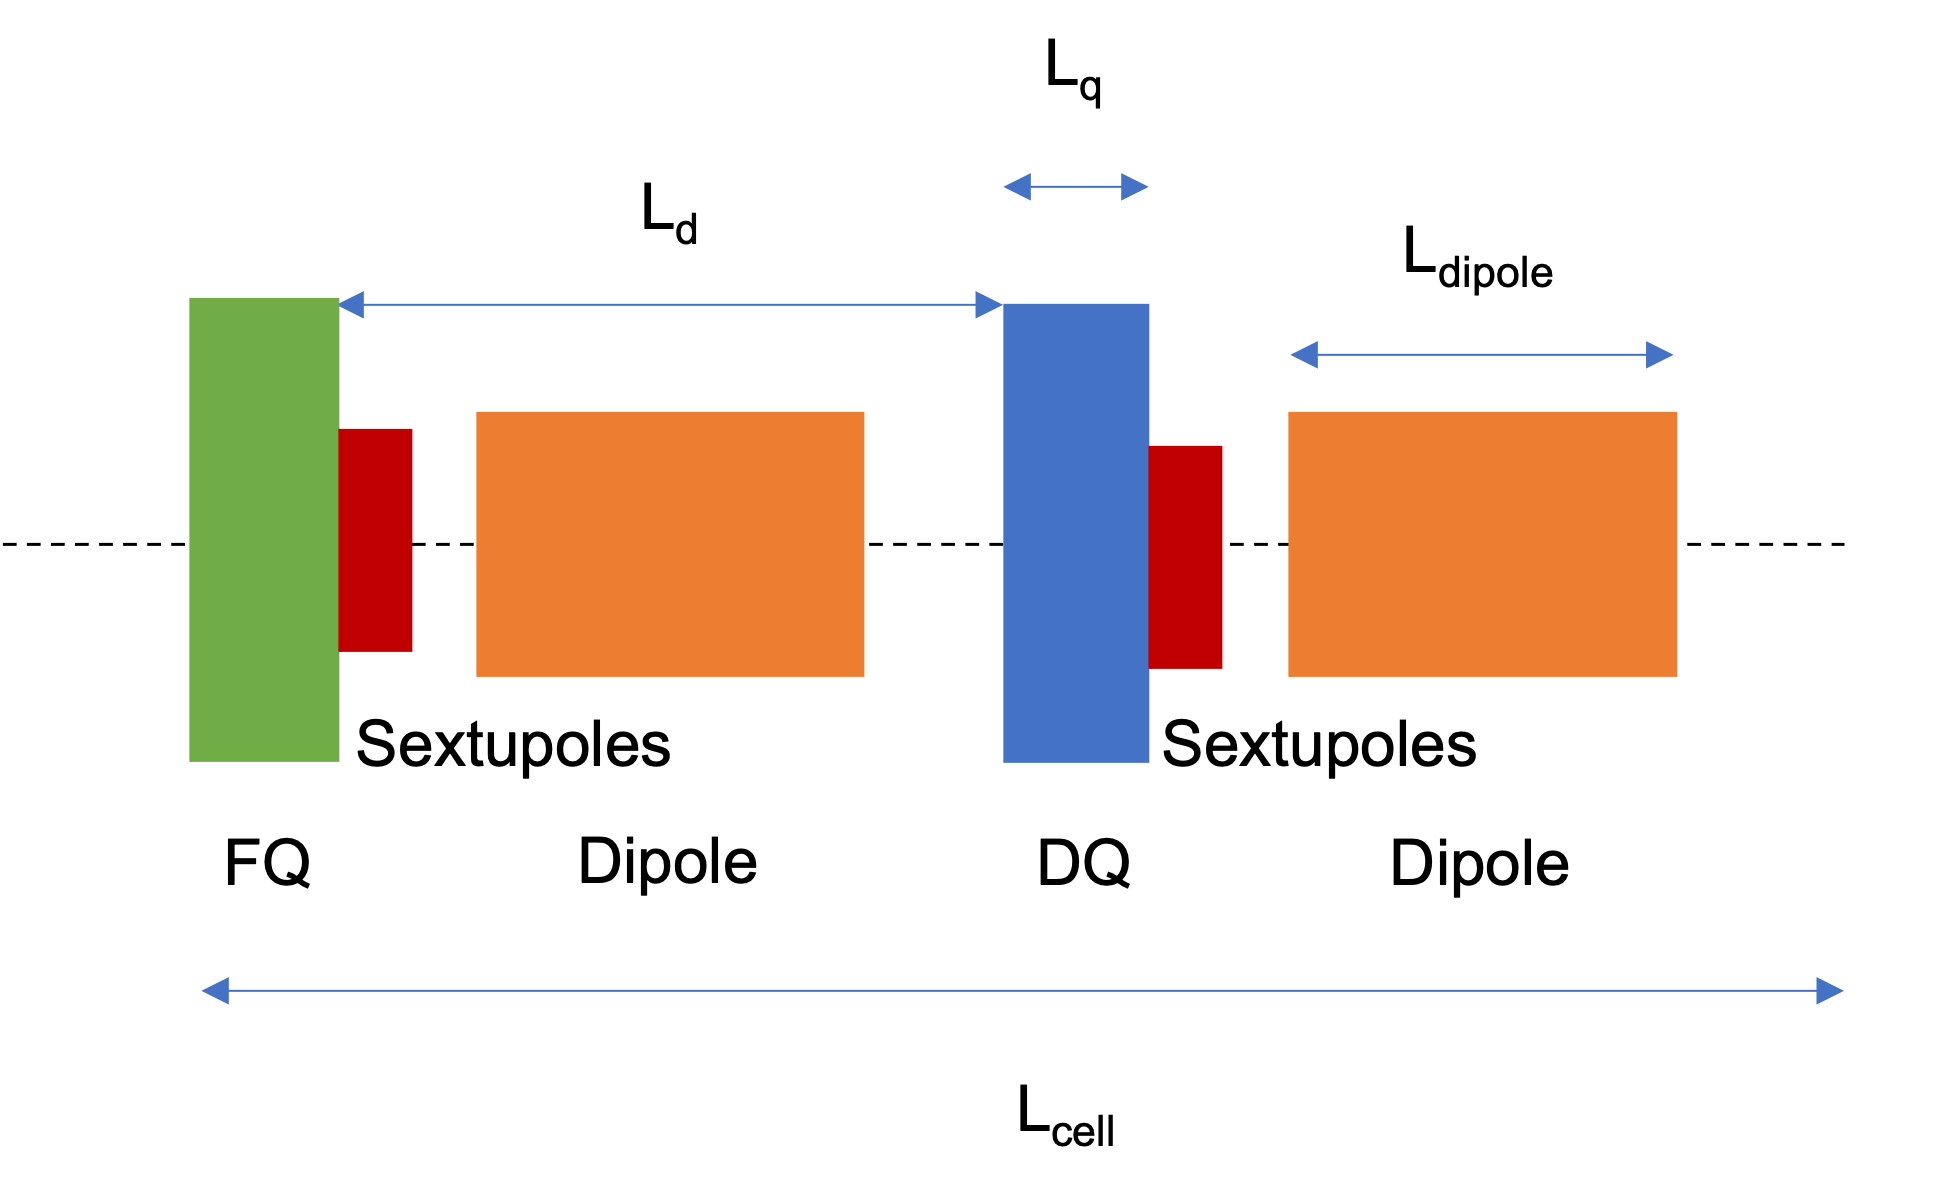
</div>

In [194]:
from matplotlib import pyplot as plt
import numpy as np

In [195]:
from cpymad.madx import Madx 
myMad = Madx(stdout=True)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.05 11:44:26      +
  ++++++++++++++++++++++++++++++++++++++++++++


1. Add 0.5 m long sextupole attached to the two qudrupoles. With a matching block adjust the vertical and horizontal chromaticity of the cell (global parameters: DQ1 and DQ2) to zero, by powering the two sextupoles (𝐾21 and 𝐾21).

In [196]:
myMad = Madx(stdout=True)
myString='''
!! General parameters
Lcell = 100;
nBend=736;

!! Dipole Parameters
Ld = 15;
Ad = 2*pi/nBend;

!! Quadrupole Parameters
K1F = 5e-3;
K1D = -K1F;
Lq =5;

!! Sextupole Parameters
K2F = 0.0;
K2D = -K2F;
Ls = 0.5;
QF: QUADRUPOLE, L:=Lq, K1:=K1F;
QD: QUADRUPOLE, L:=Lq, K1:=K1D;
BM: SBEND, L=Ld, angle:=Ad;
SF: SEXTUPOLE, L:=Ls, K2:=K2F;
SD: SEXTUPOLE, L:=Ls, K2:=K2D;

JUAS: SEQUENCE, REFER=center, L=100; !it is important to refer to the the center this time, to make it compatible with the makethin 
qf: QF, at=0+QF->L/2;
S1 : SF, at=5+SF->L/2;
b1:  BM, at=10+BM->L/2;
b2:  BM, at=30+BM->L/2;
qd: QD, at=50+QD->L/2;
S2 : SD, at=55+SD->L/2;
b3:  BM, at=60+BM->L/2;
b4:  BM, at=80+BM->L/2;
ENDSEQUENCE;

beam, particle=proton, energy=7000;
use, sequence=JUAS;
twiss, table= thick_sequence;

MAKETHIN, SEQUENCE=JUAS;
use, sequence=JUAS;


//*************************************************//
!   MATCHING OF THE TUNES
//*************************************************//
use, sequence=JUAS;

match, sequence=JUAS;
!! Variables
vary,name=K1F,step=0.0001;
vary,name=K1D,step=0.0001;
!! Constraints
global, Q1=0.25;
global, Q2=0.25;
!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 1000, tolerance=1E-12;
endmatch;
twiss, table=thin_new_wp;
value, beam->beta;

twiss, table= thin_sequence;

'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.05 11:44:28      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0007669724505        36.10855572 

                q1                dq1            betxmax              dxmax 
      0.2064690988       -0.240670538        159.7689581        2.989009703 

             dxrms             xcomax             xcorms                 q2 
       2.434308282                  0                  0       0.2063310524 

               dq2            betymax              dymax 

In [197]:
thinNonZeroChromaDFTable=myMad.table['summ'].dframe()

# Matching of the chromaticity

2. Using the 𝐾21 and 𝐾21, 𝛽-function and dispersion at the sextupole location, evaluate using the formula the sextupolar effect on the Q1 for a particle at DELTAP=0.01. Compare with the results obtained in the Tutorial 2: Part 1.

<div>
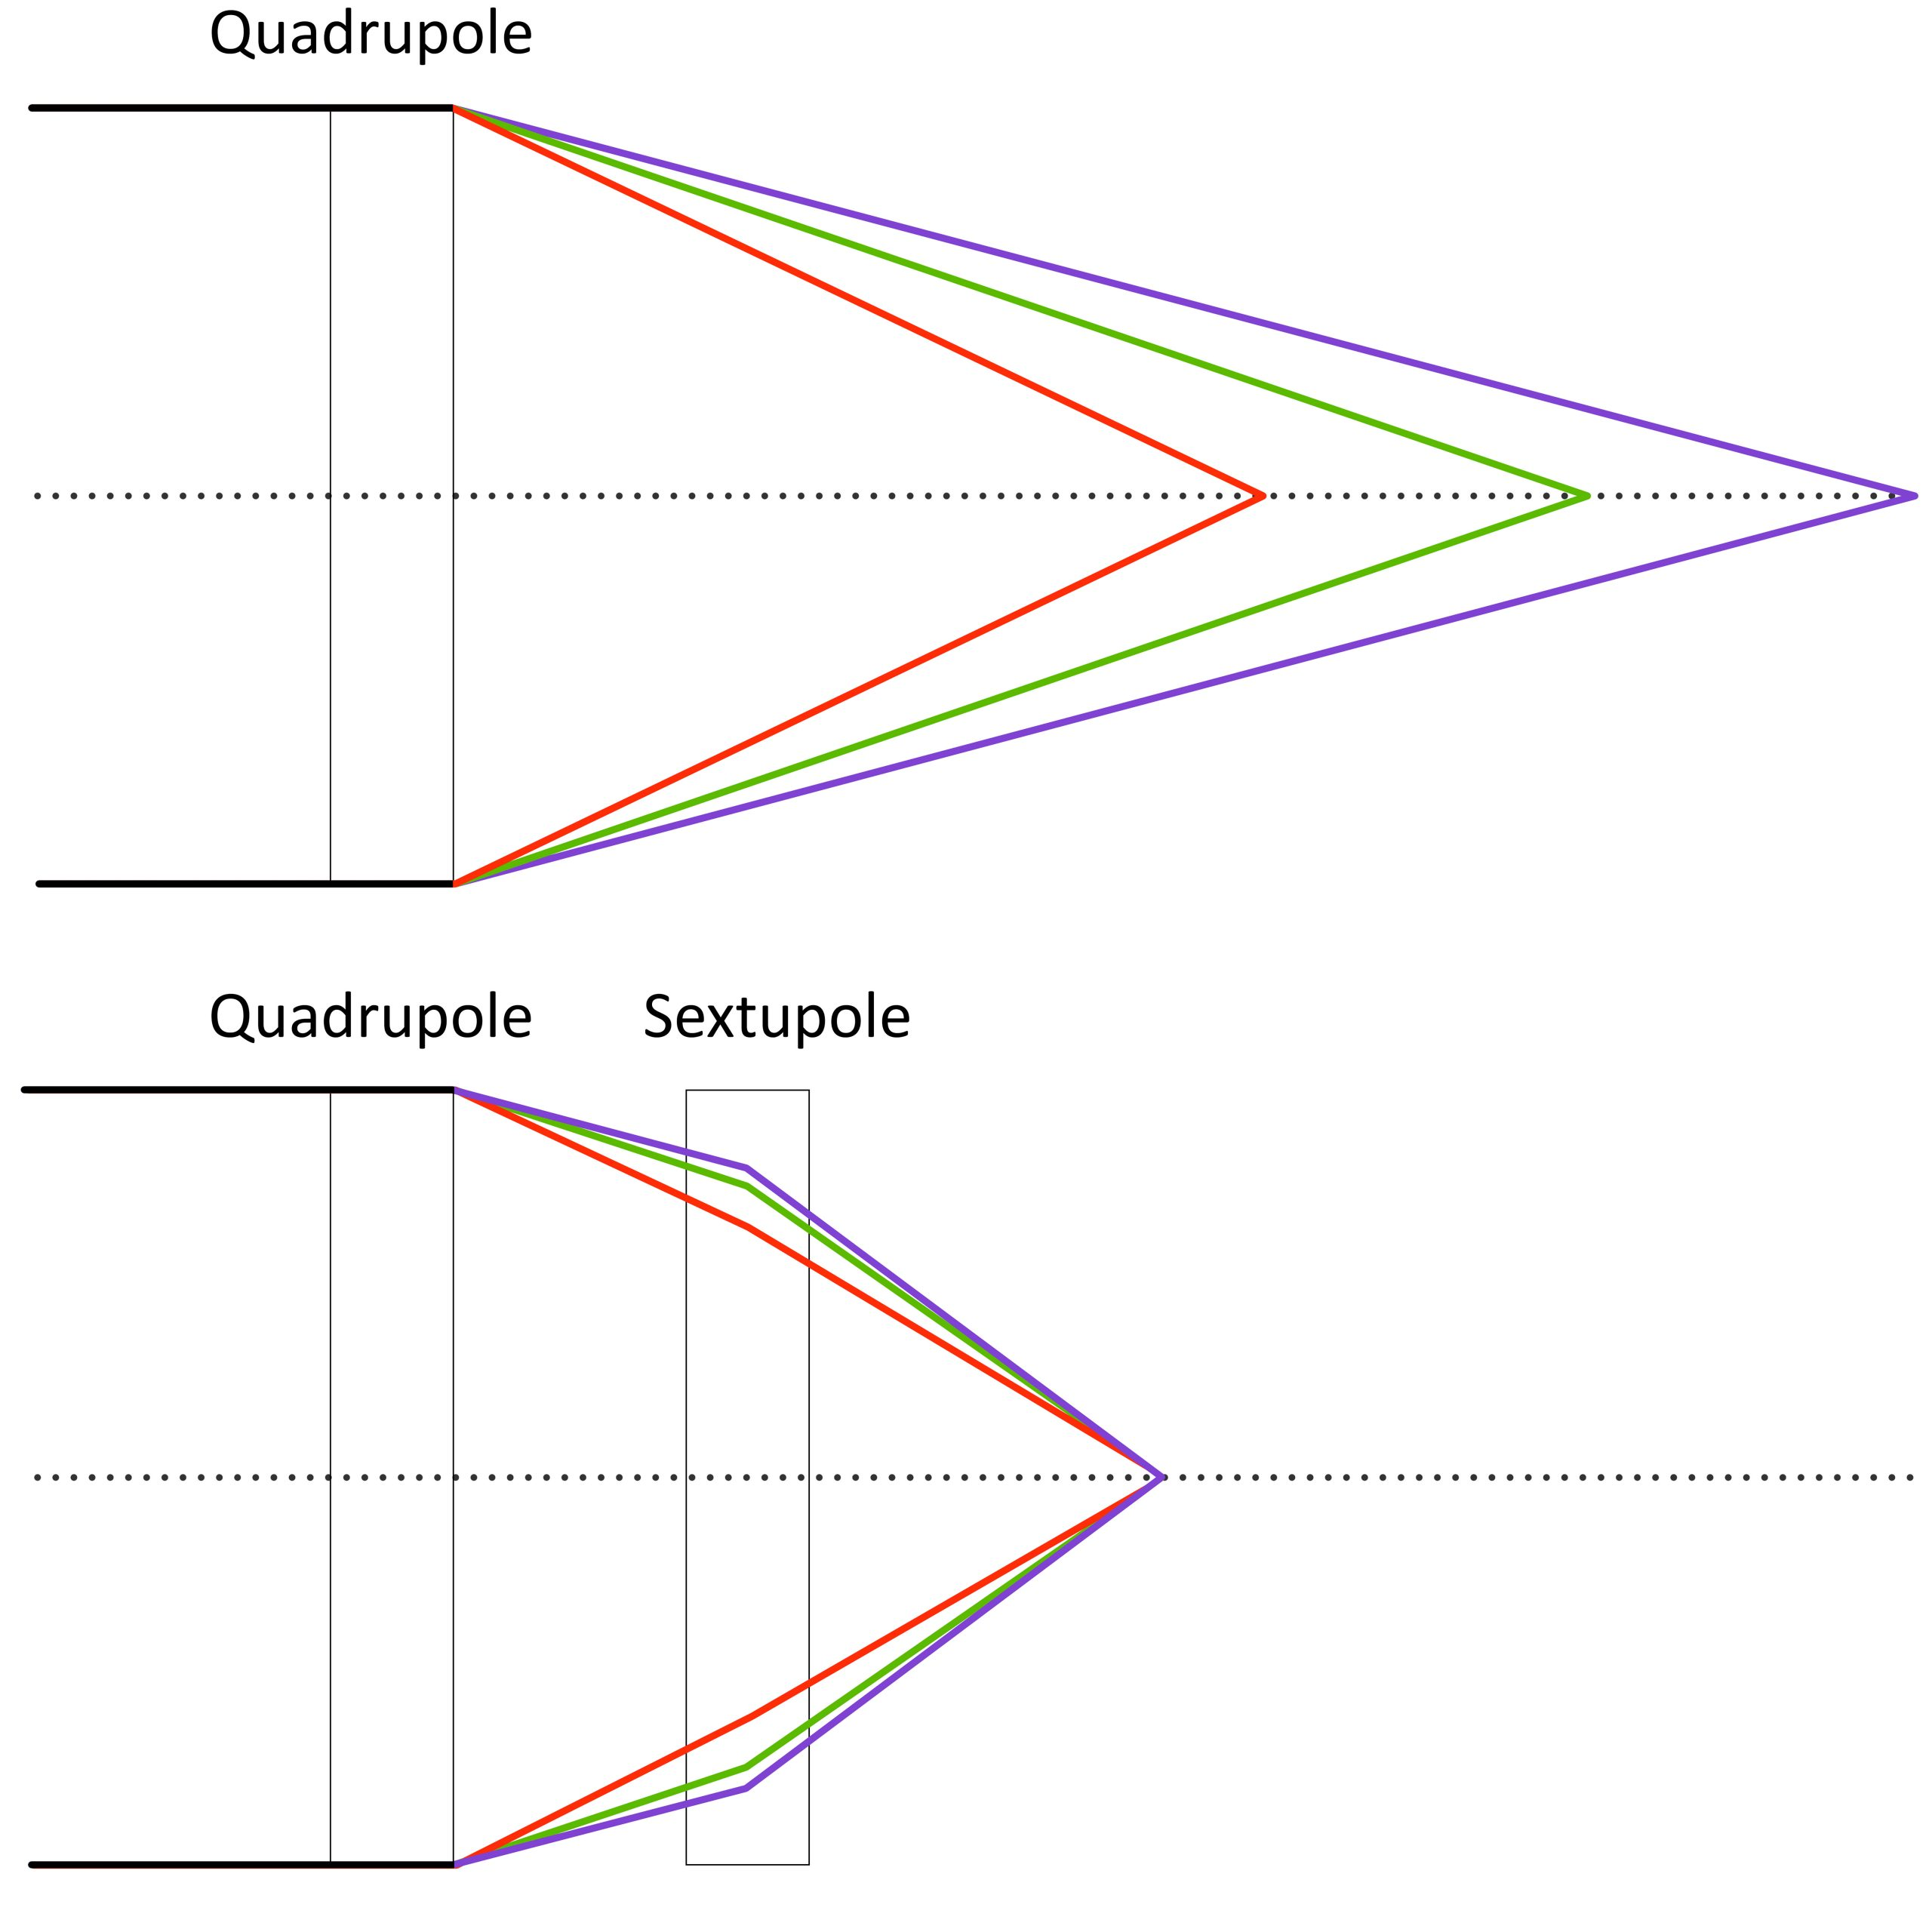
</div>

Sextupoles are needed for chromaticity correction...but they introduce non-linear fields which induces non-linear motion (resonances, tune shifts, chaotic motion...).

In [198]:
myString='''
//*************************************************//
!   MATCHING OF THE CHROMATICITY
//*************************************************//
match, sequence=JUAS;
!!! Variables
vary,name=K2F,step=0.0001;
vary,name=K2D,step=0.0001;
!!! Constraints
global, dq1=0.0; ! Chromaticities set to 0
global, dq2=0.0;
!!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 100, tolerance=1E-12;
endmatch;
'''
myMad.input(myString);

START MATCHING

number of sequences: 1
sequence name: juas
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.20252327E+00


call:       4   Penalty function =   0.50194985E-28
 ++++++++++ LMDIF ended: converged successfully
call:       4   Penalty function =   0.50194985E-28

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         dq1          4     0.00000000E+00    -6.21975138E-15     3.86853072E-29
Global constraint:         dq2          4     0.00000000E+00    -3.39259166E-15     1.15096782E-29


Final Penalty Function =   5.01949854e-29





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------------------------------------------------------------------------
k2f                       2.86196e-02

In [199]:
myString='''
//*************************************************//
!   TWISS
//*************************************************//
SELECT,FLAG=TWISS, column=name,s,betx,bety,dx,K1L,K2L;
twiss,file="Tutorial2_Part2.txt";
!plot, HAXIS=s, VAXIS=betx,bety,dx,dy,colour=100, interpolate;
'''
myMad.input(myString);
thinZeroChromaDFTable=myMad.table['twiss'].dframe()

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0005392861793        43.06161907 

                q1                dq1            betxmax              dxmax 
              0.25   -6.219751377e-15        170.6577821        2.310669633 

             dxrms             xcomax             xcorms                 q2 
       1.723324818                  0                  0               0.25 

               dq2            betymax              dymax              dyrms 
   -3.39259166e-15        170.6875088                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

Sextupoles contribution to the chromaticity from the formulas:
$\xi = \frac{1}{4*\pi}*(\beta_{x,S1}*K2_1*Dx_{S1}+\beta_{x,S2}*K2_2*Dx_{S2})$

In [200]:
thinZeroChromaDFTable[['name','s','betx','dx','k2l']]

,name,s,betx,dx,k2l
#s,juas$start:1,0.00,158.844214,2.229002,0.000000
drift_0[0],drift_0:0,2.50,170.657782,2.310670,0.000000
qf,qf:1,2.50,170.657782,2.310670,0.000000
drift_1[0],drift_1:0,5.25,157.690336,2.220835,0.000000
s1,s1:1,5.25,157.690336,2.220835,0.014310
drift_2[0],drift_2:0,10.00,136.715911,2.065666,0.000000
b1_den,b1_den:1,10.00,136.715911,2.065666,0.000000
drift_3[0],drift_3:0,17.50,107.270538,1.820663,0.000000
b1,b1:1,17.50,107.270538,1.820663,0.000000
drift_4[0],drift_4:0,25.00,82.314836,1.639621,0.000000


In [201]:
aux=thinZeroChromaDFTable
(aux['betx']*aux['dx']*1*aux['k2l']).sum()/4./np.pi

0.3181838690044951

$\Delta Q= \xi*\Delta p/p$

In [202]:
#dq1 before compensation
print("dq1")
thinNonZeroChromaDFTable["dq1"]

dq1


#e   -0.318184
Name: dq1, dtype: float64

Very good compensation!

# Tracking after chromaticity correction
3.Track a prticle with initial coordinates x,y,px,py = (1,1,0,0) mm in 100 cells and DELTAP=0.01. Plot the x-px phase space. Did you manage to recover the original tune for the off-momentum particle? 

In [203]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//
track,dump,file='withSextupoles', DELTAP=0.01;
start, x= 1e-3, px=0, y= 1e-3, py=0;
start, x= 1e-1, px=0, y= 1e-1, py=0;
run,turns=100;
endtrack;
!plot, file="MAD_track",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="MAD_track",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
myMad.input(myString);

enter TRACK module
track_deltap:               0.01
  
iteration:   1 error:   2.169345E-02 deltap:   1.000000E-02
orbit:   2.252700E-02  3.267927E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   5.379295E-04 deltap:   1.000000E-02
orbit:   2.226580E-02  3.247280E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   7.064081E-08 deltap:   1.000000E-02
orbit:   2.226577E-02  3.247277E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0              0.001                  0 
         2          0                0.1                  0 
         1        100    0.0009999737307    4.155530129e-09 
         2        100                nan                nan 

                 y                 py                  t                 pt 
             0.001                  0                  0     0.00999999991

In [204]:
off_momentum_nonlinear_particle_1=myMad.table['track.obs0001.p0001'].dframe()
off_momentum_nonlinear_particle_2=myMad.table['track.obs0001.p0002'].dframe()

<IPython.core.display.Javascript object>


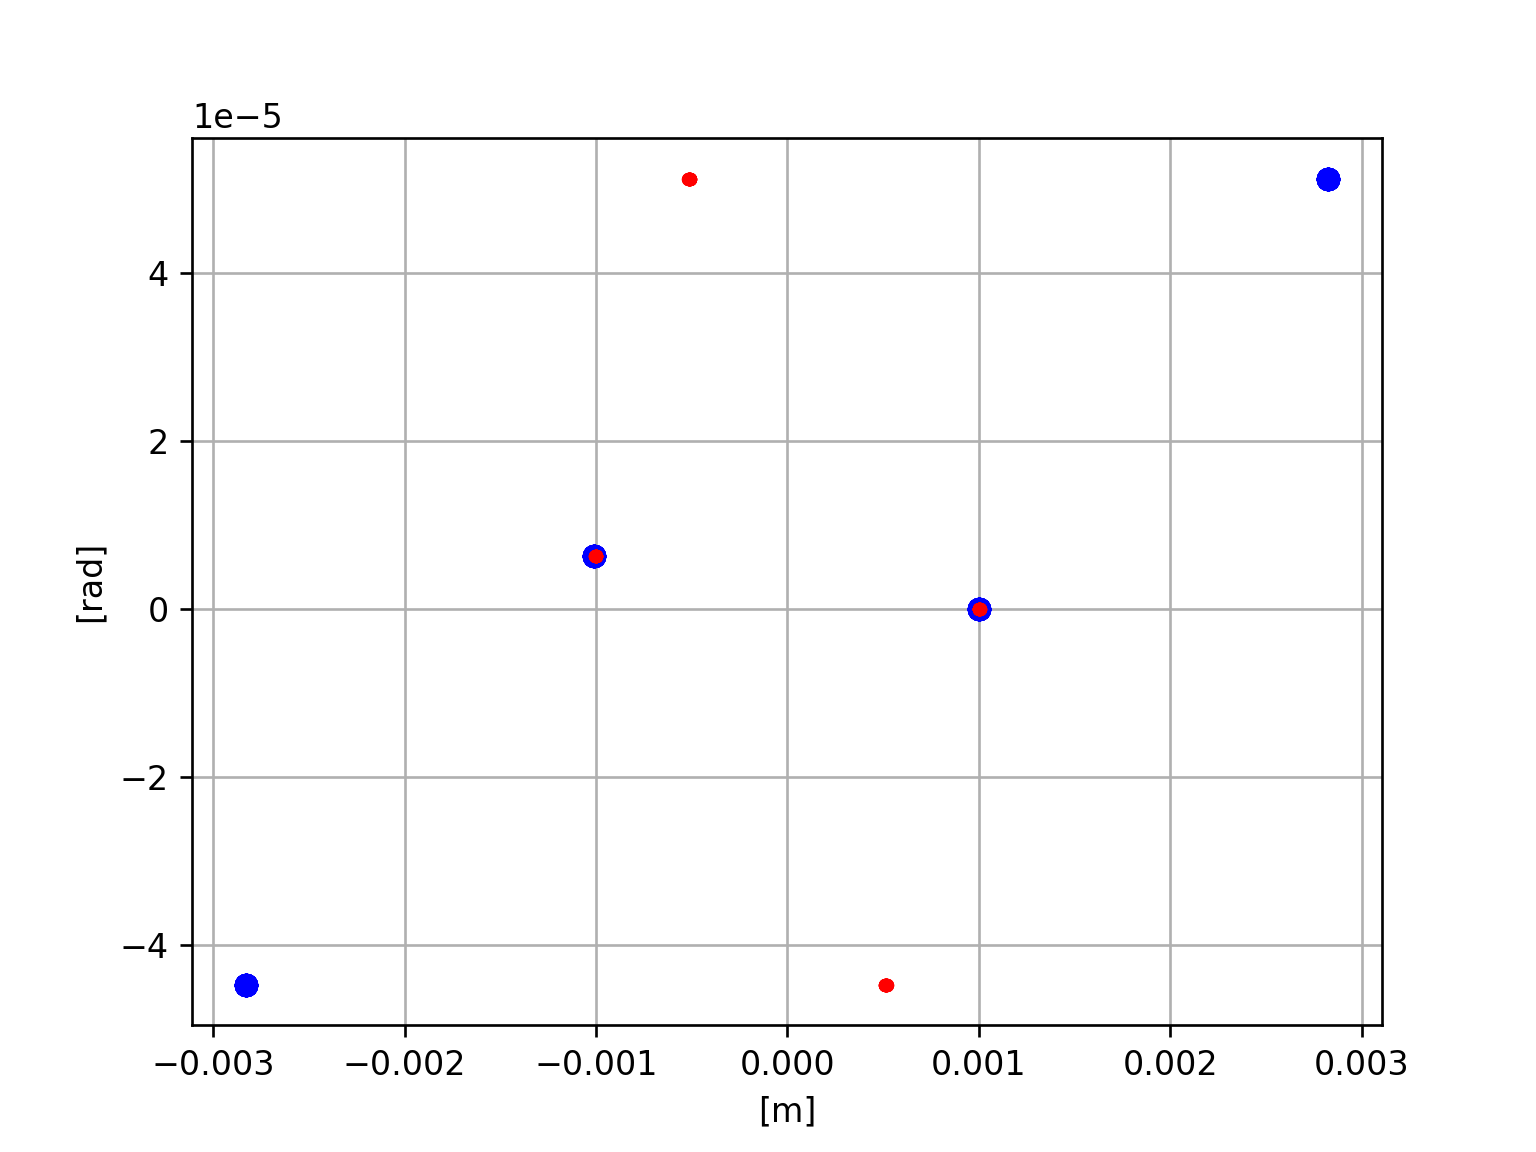

In [205]:
%matplotlib notebook
myParticle=off_momentum_nonlinear_particle_1
plt.plot(myParticle['x'],myParticle['px'],'ob',label='X-phase space')
plt.plot(myParticle['y'],myParticle['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

4. Track a particle with initial coordinates x,y,px,py=(100,100,0,0). How does the particle move in the phase space, cell after cell? Do you see the tunes? What is going on?

### But...
What is the cost of increasing the energy acceptance...? A decrease in transverse acceptance.

<IPython.core.display.Javascript object>


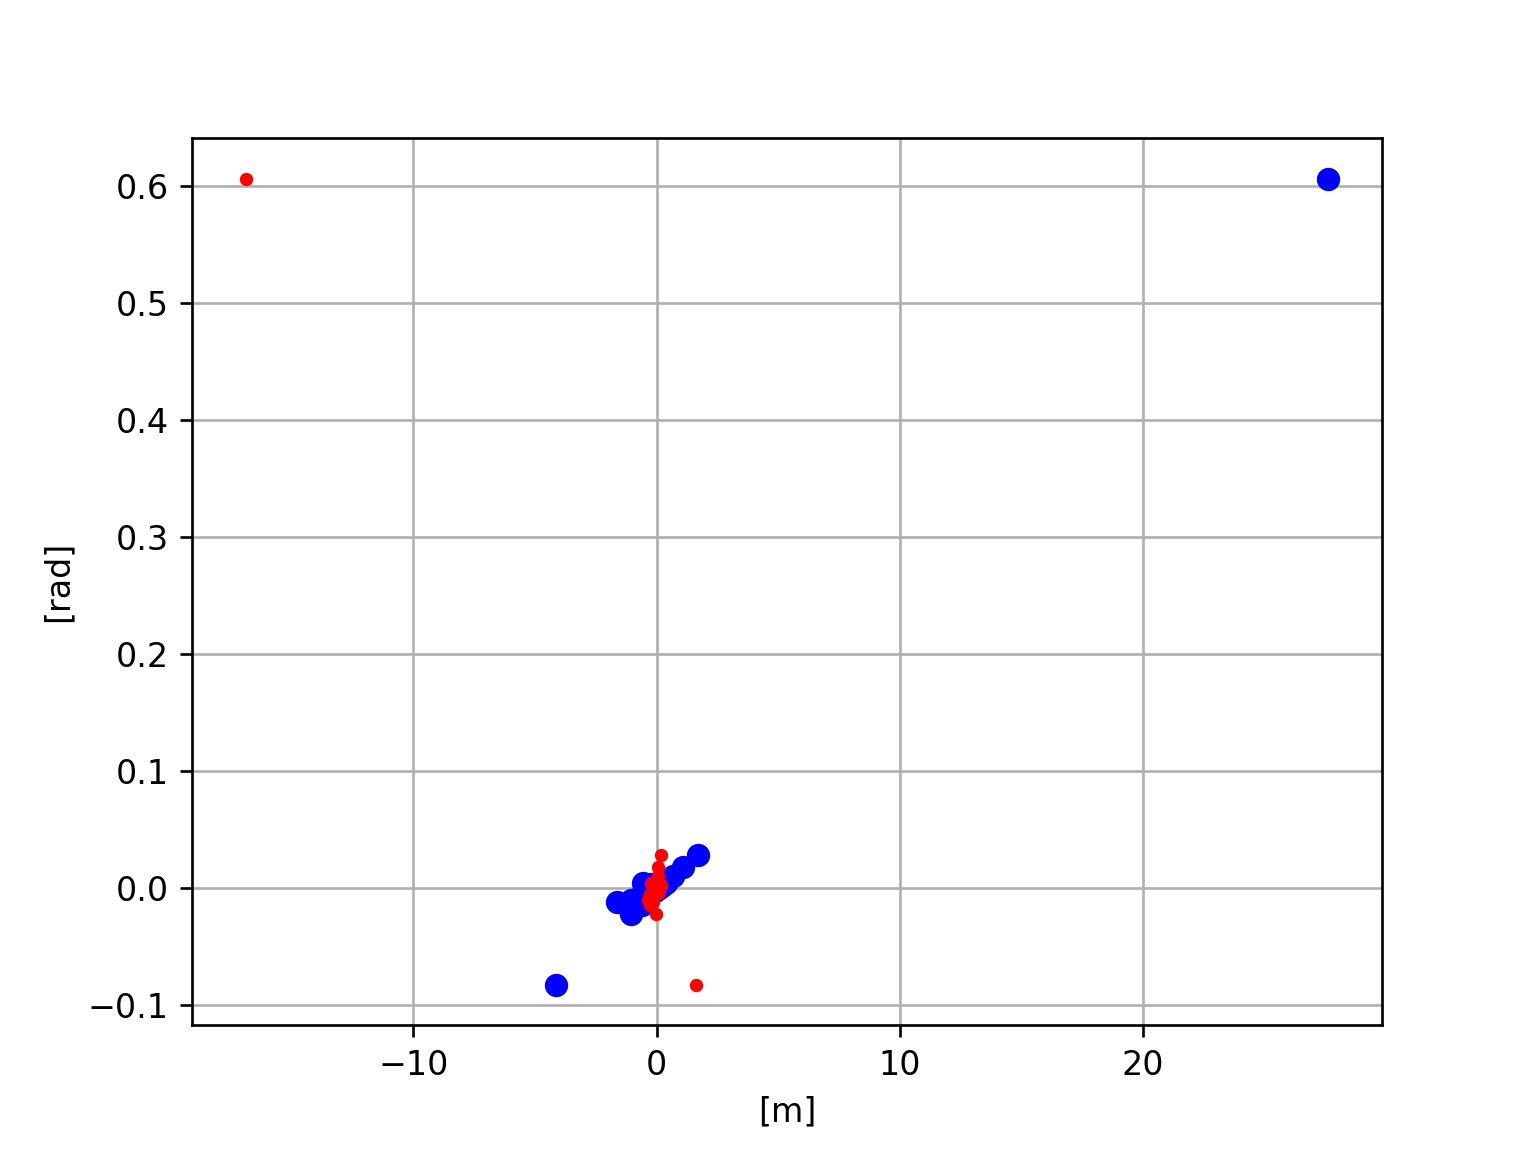

In [206]:
%matplotlib notebook
myParticle=off_momentum_nonlinear_particle_2
plt.plot(myParticle['x'],myParticle['px'],'ob',label='X-phase space')
plt.plot(myParticle['y'],myParticle['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

<IPython.core.display.Javascript object>


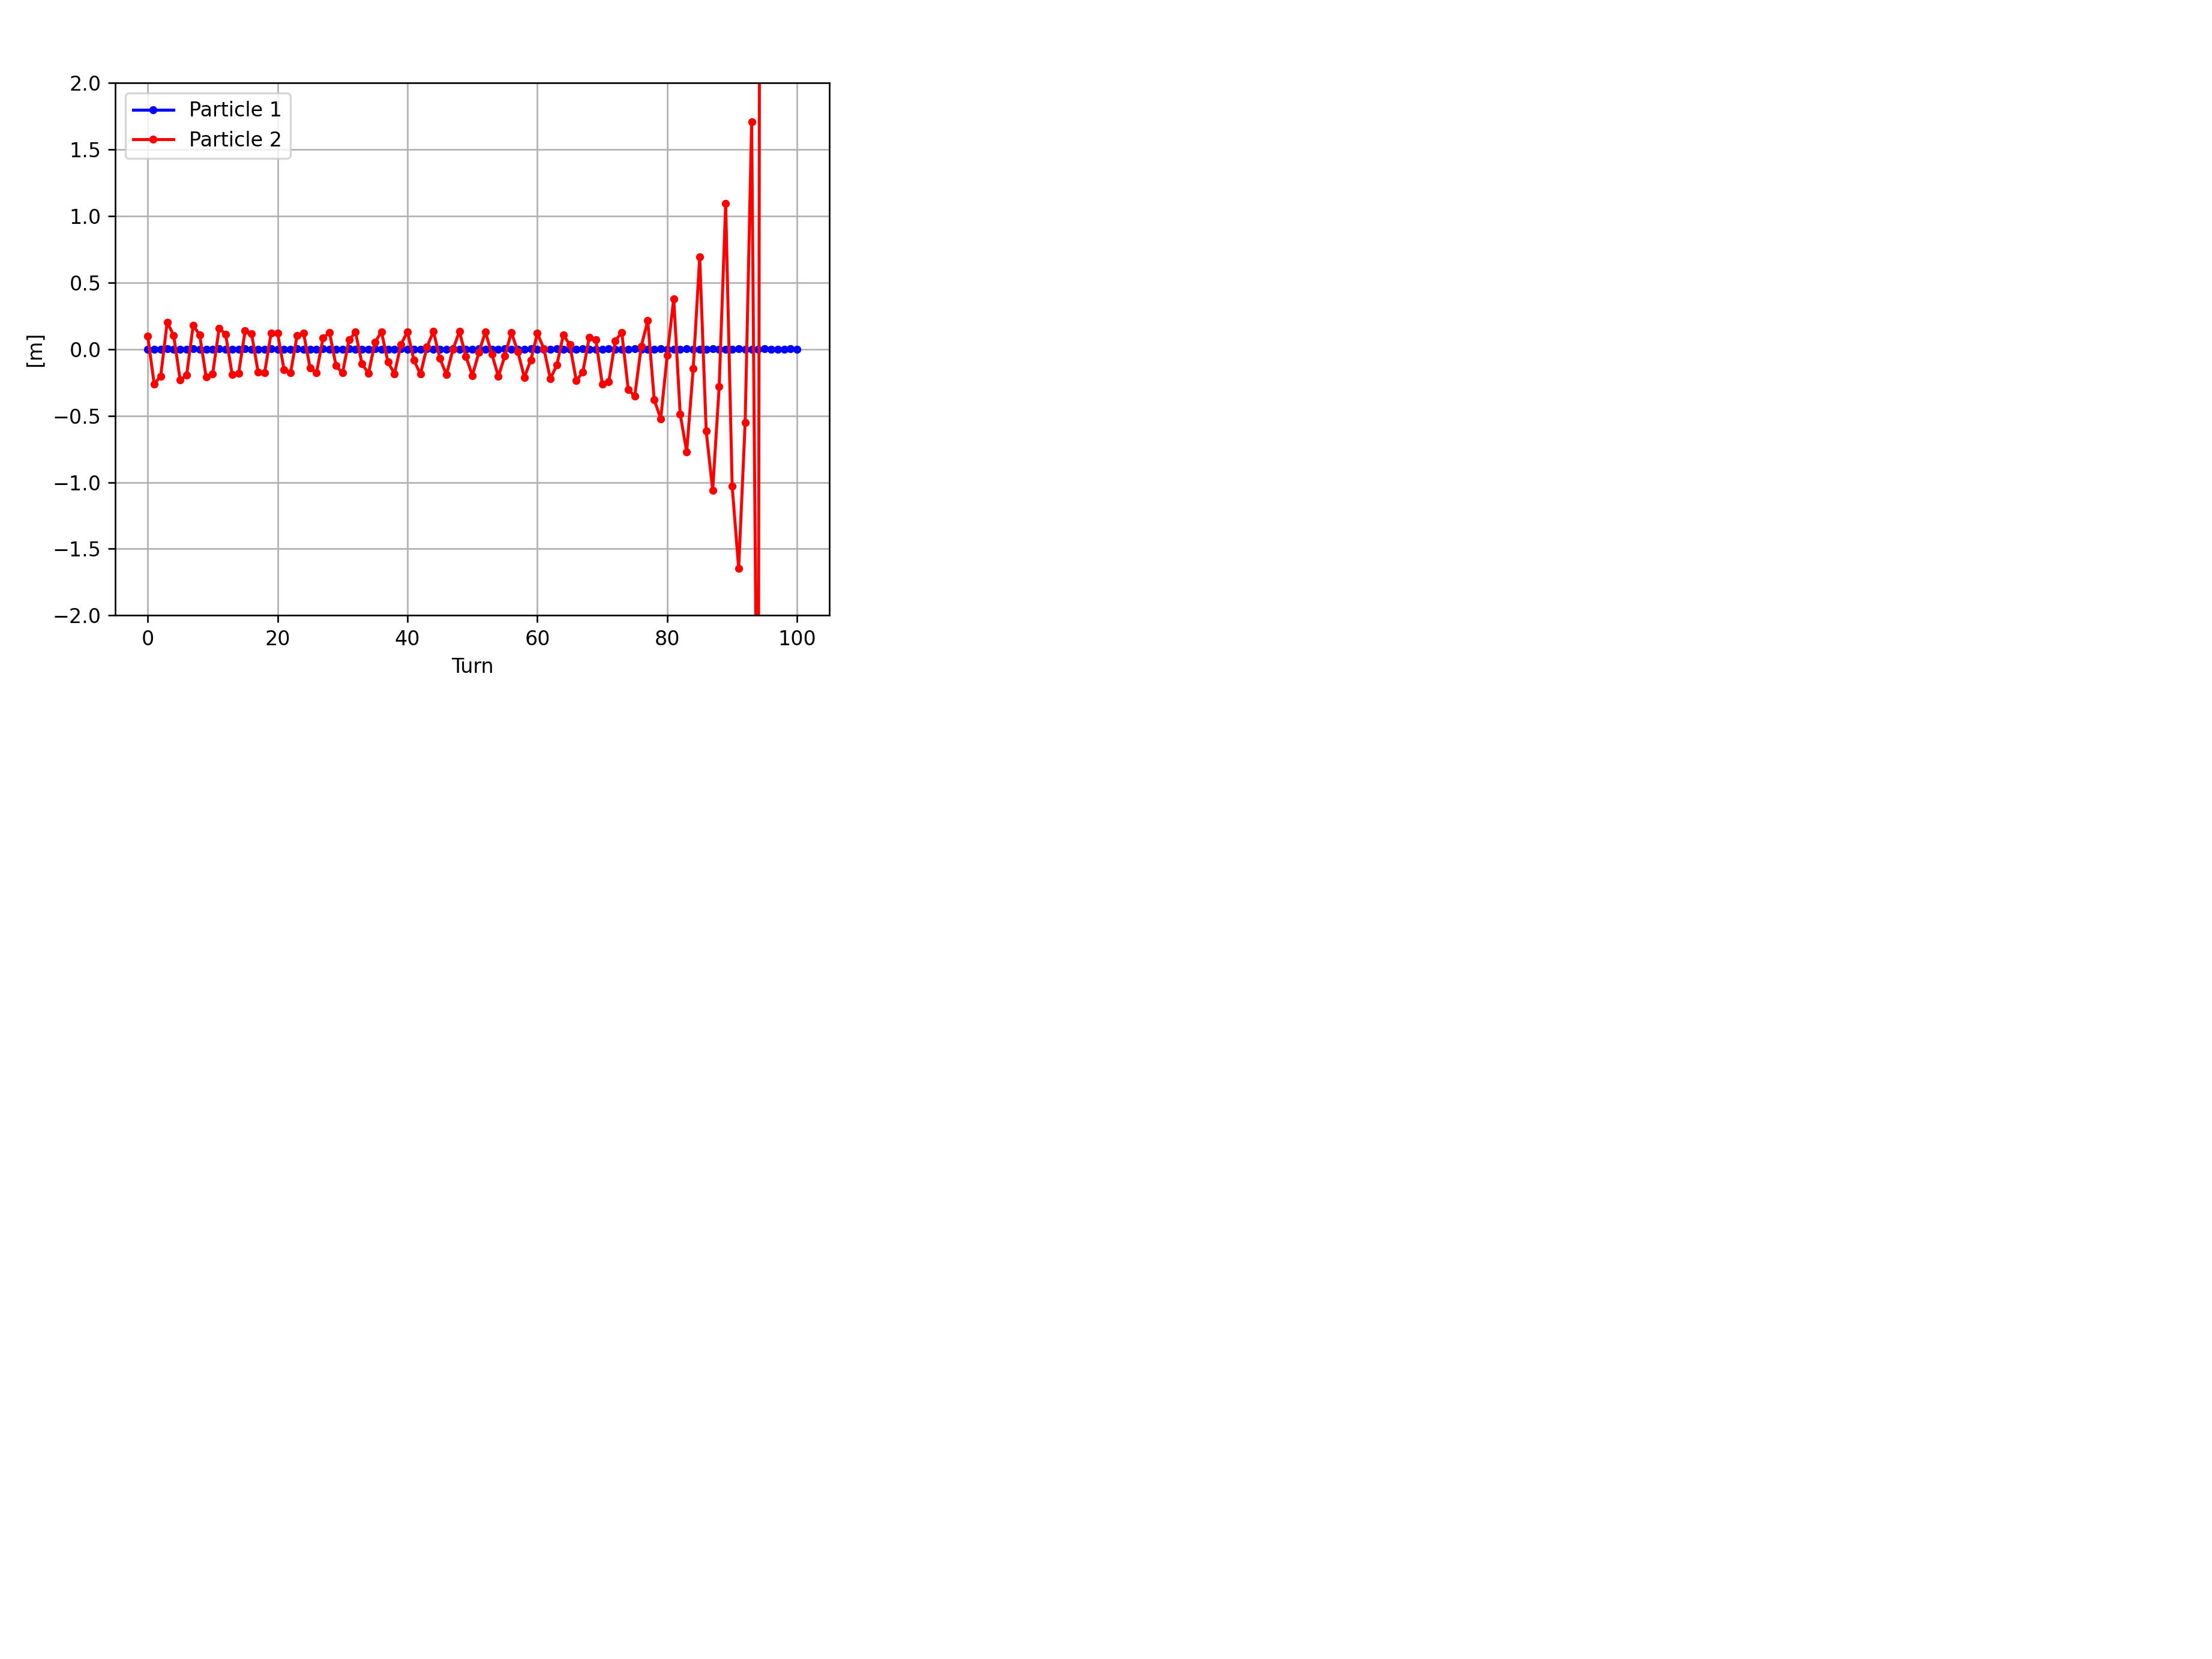

In [207]:
%matplotlib notebook
plt.plot(off_momentum_nonlinear_particle_1['turn'],off_momentum_nonlinear_particle_1['x'],'.-b', label='Particle 1')
plt.plot(off_momentum_nonlinear_particle_2['turn'],off_momentum_nonlinear_particle_2['x'],'.-r', label='Particle 2' )
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');
plt.ylim(-2,2)
plt.grid()

# Matching the tunes at (0.23,0.23)
5. Move the tunes to (0.23, 0.23) and repeat the previous point. Is now the particle stable?

In [208]:
myString='''
//*************************************************//
!   MATCHING OF THE TUNES
//*************************************************//
use, sequence=JUAS;

match, sequence=JUAS;
!! Variables
vary,name=K1F,step=0.0001;
vary,name=K1D,step=0.0001;
!! Constraints
global, Q1=0.23;
global, Q2=0.23;
!! The next line ask MAD-X to do the matching itself
LMDIF, calls = 1000, tolerance=1E-12;
endmatch;
'''
myMad.input(myString);

START MATCHING

number of sequences: 1
sequence name: juas
number of variables:    2
user given constraints: 1
total constraints:      2

START LMDIF:

Initial Penalty Function =   0.80000000E-01


call:       4   Penalty function =   0.67389929E-04
call:       7   Penalty function =   0.43749329E-10
call:      10   Penalty function =   0.12418907E-19
 ++++++++++ LMDIF ended: converged successfully
call:      10   Penalty function =   0.12418907E-19

MATCH SUMMARY

Node_Name                  Constraint   Type  Target Value       Final Value        Penalty
--------------------------------------------------------------------------------------------------
Global constraint:         q1           4     2.30000000E-01     2.30000000E-01     5.54022419E-21
Global constraint:         q2           4     2.30000000E-01     2.30000000E-01     6.87868253E-21


Final Penalty Function =   1.24189067e-20





Variable                 Final Value  Initial Value Lower Limit  Upper Limit 
--------------

In [209]:
myString='''
//*************************************************//
!   TRACKING
//*************************************************//
track,dump,file='./firstpart/newWP', DELTAP=0.01;
start, x= 1e-3, px=0, y= 1e-3, py=0;
start, x= 1e-1, px=0, y= 1e-1, py=0;
run,turns=100;
endtrack;
!plot, file="MAD_track",table=track,haxis=x,vaxis=px,
!particle=1,2, colour=100;
!plot, file="MAD_track",table=track,haxis=y,vaxis=py,
!particle=1,2, colour=100;
'''
myMad.input(myString);

enter TRACK module
track_deltap:               0.01
  
iteration:   1 error:   2.132920E-02 deltap:   1.000000E-02
orbit:   2.539958E-02  3.437826E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   2 error:   6.535056E-04 deltap:   1.000000E-02
orbit:   2.504765E-02  3.412053E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00
  
iteration:   3 error:   1.261471E-07 deltap:   1.000000E-02
orbit:   2.504758E-02  3.412046E-04  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: tracksumm

    number       turn                  x                 px 
         1          0              0.001                  0 
         2          0                0.1                  0 
         1        100    9.855010256e-05   -1.358341187e-05 
         2        100      0.05307021097   -0.0006440131512 

                 y                 py                  t                 pt 
             0.001                  0                  0     0.00999999991

In [210]:
optWP_off_momentum_nonlinear_particle_1=myMad.table['track.obs0001.p0001'].dframe()
optWP_off_momentum_nonlinear_particle_2=myMad.table['track.obs0001.p0002'].dframe()

<IPython.core.display.Javascript object>


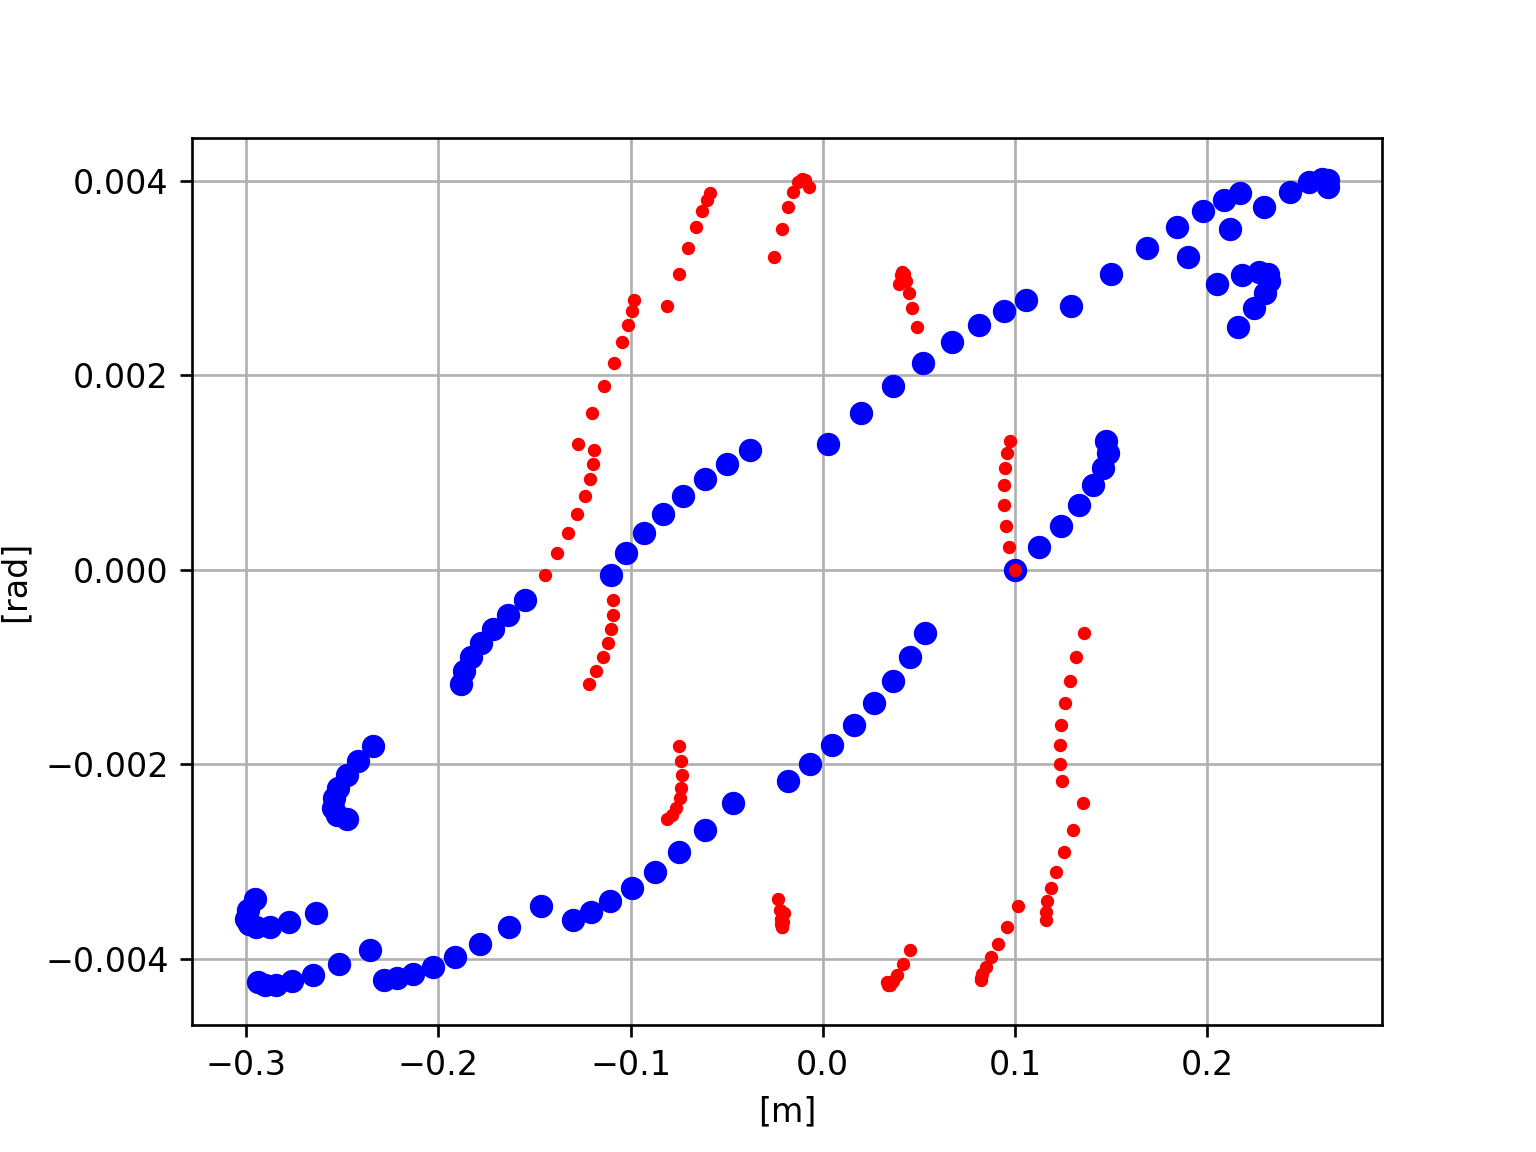

In [211]:
%matplotlib notebook
myParticle=optWP_off_momentum_nonlinear_particle_2
plt.plot(myParticle['x'],myParticle['px'],'ob',label='X-phase space')
plt.plot(myParticle['y'],myParticle['px'],'.r',label='Y-phase space')
plt.xlabel('[m]')
plt.ylabel('[rad]')
plt.grid()

<IPython.core.display.Javascript object>


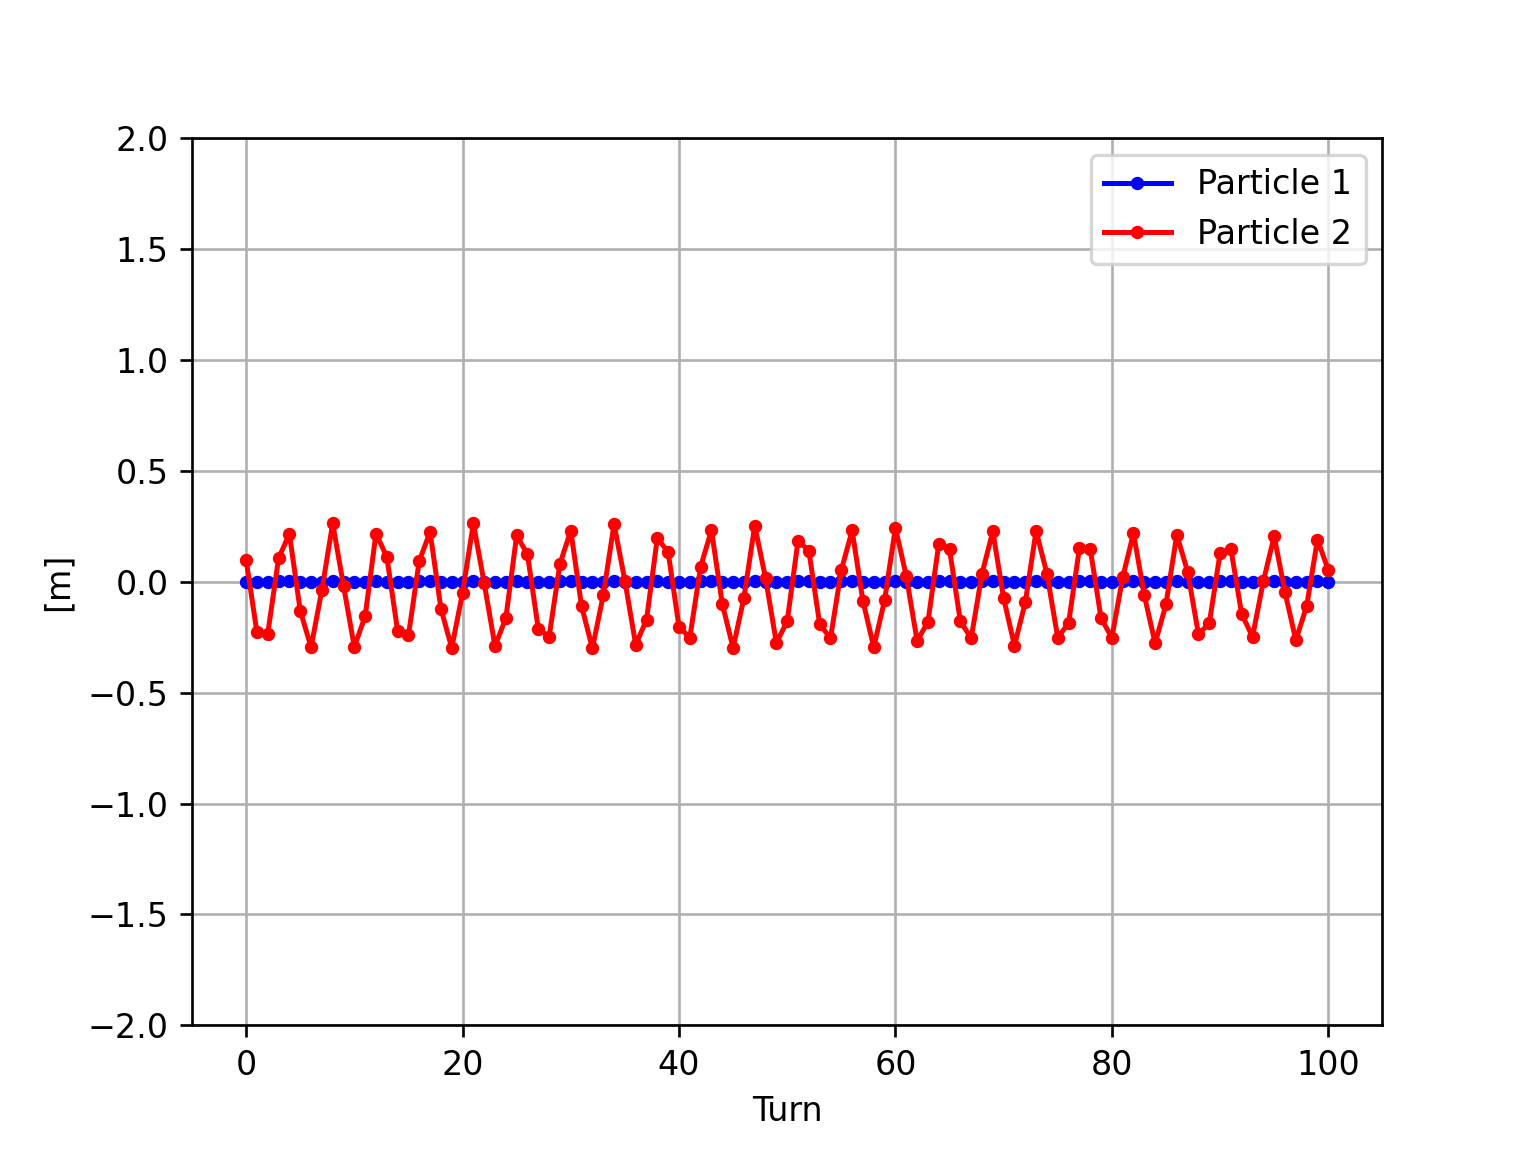

In [212]:
%matplotlib notebook
plt.plot(optWP_off_momentum_nonlinear_particle_1['turn'],optWP_off_momentum_nonlinear_particle_1['x'],'.-b', label='Particle 1')
plt.plot(optWP_off_momentum_nonlinear_particle_2['turn'],optWP_off_momentum_nonlinear_particle_2['x'],'.-r', label='Particle 2' )
plt.xlabel('Turn')
plt.ylabel('[m]');
plt.legend(loc='best');
plt.ylim(-2,2)
plt.grid()

We can improve the solution by moving far from resonances, thus selecting an optimum WORKING POINT.